In [1]:
import experiment as me
import plot_utils
from qiskit import Aer
from tqdm import tqdm

import matplotlib.pyplot as plt

# Parameters

In [2]:
method = ('COBYLA', {'rhobeg': 1.2,
                     'maxiter': 1000,
                     'disp': False,
                     'catol': 0.0002})

density = 0.4

backend_creator = lambda: Aer.get_backend('qasm_simulator')

# First section: Landscape plotting

In [3]:
hist_exp_dim=3

In [4]:
small_p_experiment = me.Experiment(p=1, dim=hist_exp_dim,
                                   method=method,
                                   create_backend=backend_creator)


model = small_p_experiment.generate_model(dens=density)


# Plotting routes and landscape for p=1
### For theta to be 2D

In [5]:
pathing = small_p_experiment.solve_and_record_pathing(model)

N = 20
exp_function = small_p_experiment.get_expectation_function(model)
landscape = plot_utils.compute_energy_landscape(exp_function, grid=(N, N))

final_theta, route_theta, route_function, final_function = pathing

## Landscape and points visited during optimization

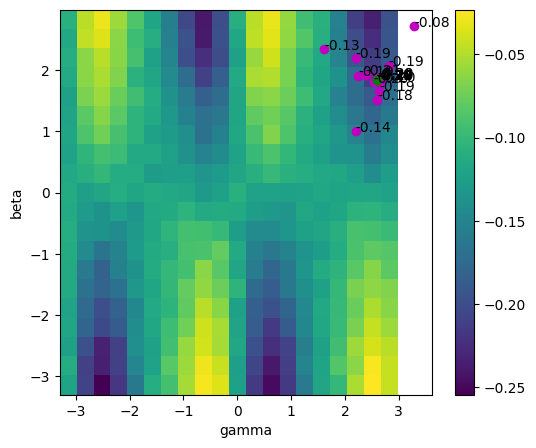

In [6]:
plot_utils.plot_energy_landscape(landscape, pathing)

## Energy value along the optimizer route

-0.19809683277377582


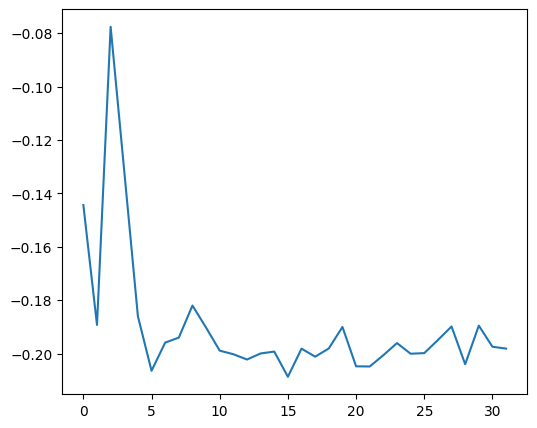

In [7]:
plot_utils.plot_energy_route(route_function, final_function)

## Plotting state historgram

{'101': 72, '110': 114, '111': 104, '001': 83, '011': 254, '100': 98, '010': 212, '000': 87}


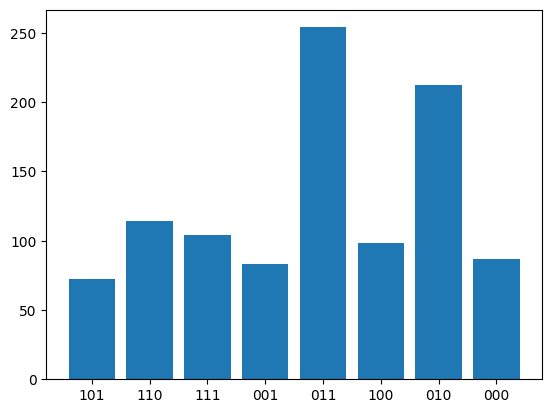

In [8]:
counts, _ = small_p_experiment.retrieve_state_distribution(model, final_theta)
plot_utils.analazing_the_result(counts)

## The brute force results for sanity check

In [9]:
print(small_p_experiment.brute_force(model))

{'000': 0.0, '001': 0.0, '010': -0.38451646707786535, '011': -0.38451646707786535, '100': 0.0, '101': 0.0, '110': -0.08682683269790203, '111': -0.08682683269790203}


# Plotting routes and landscape for p=4
### Theta will be 8-dim vector, so no landscape plotting

In [10]:
big_p_experiment = me.Experiment(p=4, dim=hist_exp_dim,
                                 method=method,
                                 create_backend=lambda: Aer.get_backend(
                                     'qasm_simulator')
                                 )
#same model as in experiment with p = 1
pathing = big_p_experiment.solve_and_record_pathing(model)
final_theta, route_theta, route_function, final_function = pathing


## Energy value along the optimizer route

-0.34771707187722967


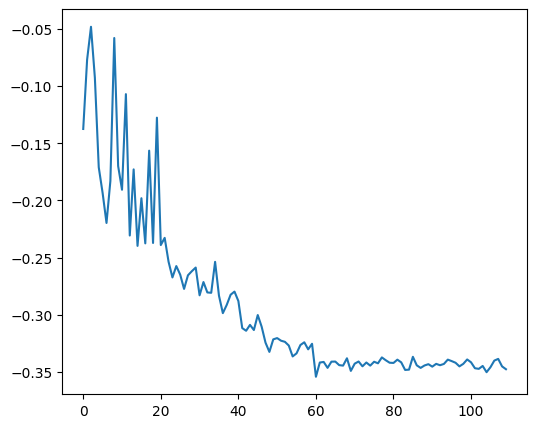

In [11]:
plot_utils.plot_energy_route(route_function, final_function)

## Plotting state histogram

{'101': 13, '001': 11, '011': 474, '100': 16, '111': 39, '110': 46, '000': 13, '010': 412}


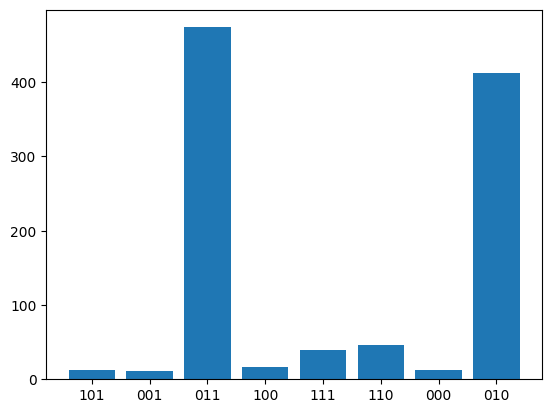

In [12]:

counts, _ = big_p_experiment.retrieve_state_distribution(model, final_theta)
plot_utils.analazing_the_result(counts)

# Brute force sanity check

In [13]:
print(big_p_experiment.brute_force(model))

{'000': 0.0, '001': 0.0, '010': -0.38451646707786535, '011': -0.38451646707786535, '100': 0.0, '101': 0.0, '110': -0.08682683269790203, '111': -0.08682683269790203}


# Second section: Probablity distributions

In [14]:
probability_exp_dim = 10
samples_number = 5

## Distributions for p = 1

In [15]:
first_dist_exp = me.Experiment(p=1,
                               dim=probability_exp_dim,
                               method=method,
                               create_backend=backend_creator)

models = [first_dist_exp.generate_model(dens=density)
          for _ in range(samples_number)]

models_and_brute_solutions = [
    (model, first_dist_exp.brute_force(model)) for model in tqdm(models)]

100%|██████████| 5/5 [00:02<00:00,  1.98it/s]


100%|██████████| 5/5 [00:39<00:00,  7.96s/it]


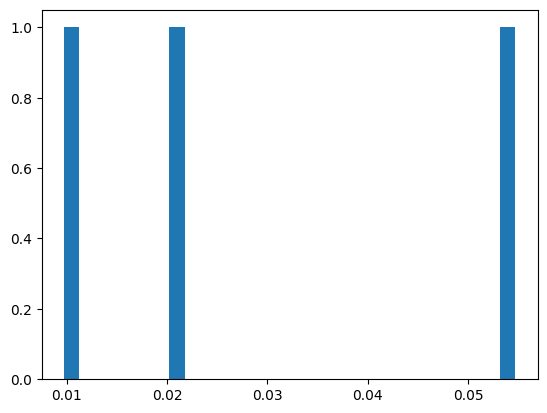

100%|██████████| 5/5 [00:32<00:00,  6.44s/it]


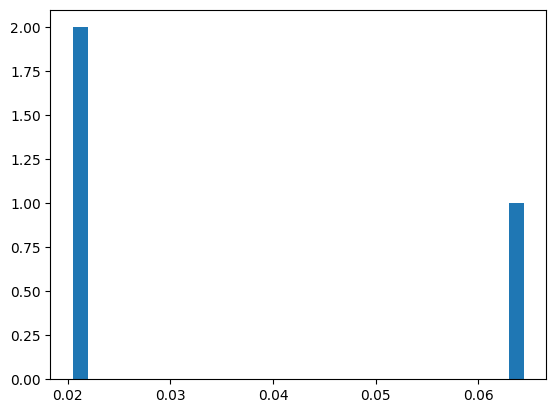

100%|██████████| 5/5 [00:33<00:00,  6.76s/it]


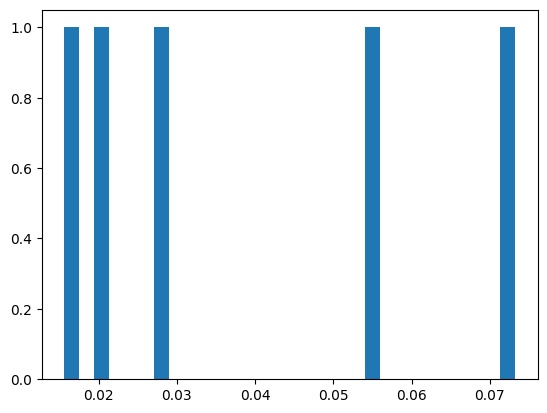

In [16]:
plt.hist(first_dist_exp.compute_probability_distribution(
    models_and_brute_solutions,
    me.retrieve_probabilities1), bins=30)
plt.show()  # вероятность правильного ответа, двойные выкидываем
plt.hist(first_dist_exp.compute_probability_distribution(
    models_and_brute_solutions,
    me.retrieve_probabilities2), bins=30)
plt.show()  # вероятность правильного ответа при правильно решенной задаче
plt.hist(first_dist_exp.compute_probability_distribution(
    models_and_brute_solutions,
    me.retrieve_probabilities3), bins=30)
plt.show()  # вероятность правильного ответа, двойные складываем


## Distributions for p = 2

100%|██████████| 5/5 [00:48<00:00,  9.60s/it]


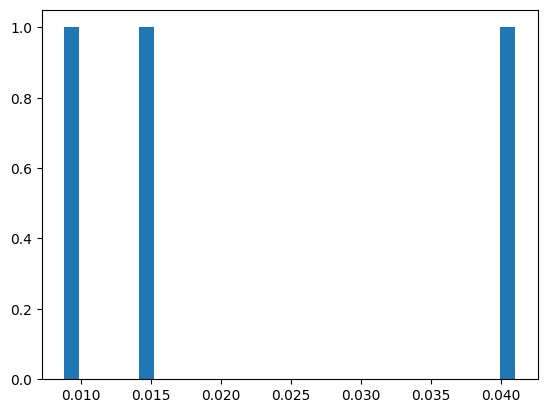

 60%|██████    | 3/5 [00:28<00:17,  8.59s/it]

In [17]:
second_dist_exp = me.Experiment(p=2,
                         dim=probability_exp_dim,
                         method=method,
                         create_backend=backend_creator)

#with same samples

plt.hist(second_dist_exp.compute_probability_distribution(
    models_and_brute_solutions,
    me.retrieve_probabilities1), bins=30)
plt.show()  # вероятность правильного ответа, двойные выкидываем
plt.hist(second_dist_exp.compute_probability_distribution(
    models_and_brute_solutions,
    me.retrieve_probabilities2), bins=30)
plt.show()  # вероятность правильного ответа при правильно решенной задаче
plt.hist(second_dist_exp.compute_probability_distribution(
    models_and_brute_solutions,
    me.retrieve_probabilities3), bins=30)
plt.show()  # вероятность правильного ответа, двойные складываем

## Distributions for p = 3

In [ ]:
third_dist_exp = me.Experiment(p=3,
                               dim=probability_exp_dim,
                               method=method,
                               create_backend=backend_creator)

# with same samples

plt.hist(third_dist_exp.compute_probability_distribution(
    models_and_brute_solutions,
    me.retrieve_probabilities1), bins=30)
plt.show()  # вероятность правильного ответа, двойные выкидываем
plt.hist(third_dist_exp.compute_probability_distribution(
    models_and_brute_solutions,
    me.retrieve_probabilities2), bins=30)
plt.show()  # вероятность правильного ответа при правильно решенной задаче
plt.hist(third_dist_exp.compute_probability_distribution(
    models_and_brute_solutions,
    me.retrieve_probabilities3), bins=30)
plt.show()  # вероятность правильного ответа, двойные складываем


# Average probabilities?

In [ ]:
def compute_avg_probs(p):
    experiment = me.Experiment(p=p,
                               dim=probability_exp_dim,
                               method=method,
                               create_backend=backend_creator)
    return experiment.compute_probability_avg(models_and_brute_solutions,
                                              me.retrieve_probabilities1)


In [ ]:
rng = list(range(1,4))
a = [compute_avg_probs(p=i) for i in rng]
plt.bar(rng, a)

In [ ]:
rng = list(range(3,100))
a = [compute_avg_probs(p=i) for i in rng]
plt.bar(rng, a)

## How many times to run until success probability is  0.7

In [ ]:
def compute_avg_probs(p):
    experiment = me.Experiment(p=p,
                               dim=probability_exp_dim,
                               method=method,
                               create_backend=backend_creator)
    return experiment.validate_fixed_prop(prob=0.7, dens=density) 

In [ ]:
a = [compute_avg_probs(p=i) for i in range(1, 4)]
plt.bar(range(1, 4), a)

## Accuracy per circut depth

In [ ]:
def count_solved_fraction(p):
    experiment = me.Experiment(p=p,
                               dim=probability_exp_dim,
                               method=method,
                               create_backend=backend_creator)
    cnt = 0
    for model, brute_solution in models_and_brute_solutions:
        solution = experiment.solve(model)
        final_theta = solution.x
        counts, (item, score) = experiment.retrieve_state_distribution(model, final_theta)
        if experiment.validate(item, brute_solution):
            cnt += 1

    return cnt

In [ ]:
rng = list(range(1,4))
plt.bar(rng, [count_solved_fraction(p=i) for i in rng])
plt.show()

* сколько надо сделать запусков для гарантированной точности?


* гистограмма
* график 
* понять влияние на вероятность разных жлементов происходящего
* много раз запустить, какие дает вероятности на одной задаче...

* смотреть фиделети относительно правильного ответа внутри схемы по слоям, попарные посмотреть

# Behaviour on close matricies

In [ ]:
neight_exp_dim = 3

neigh_experiment = me.Experiment(p=1,
                                 dim=neight_exp_dim,
                                 method=method,
                                 create_backend=backend_creator)
N = 200

center_matrix = neigh_experiment.generate_matrix(dens=density)
center_model = me.model_from_matrix(center_matrix)
center_theta = neigh_experiment.solve(center_model).x
_, (item, _) = neigh_experiment.retrieve_state_distribution(center_model,
                                                            center_theta)
brute_solution = neigh_experiment.brute_force(center_model)

assert neigh_experiment.validate(item, brute_solution), "should be a solution"

In [ ]:
def solve_on_neighbourhood(step):
    from scipy.spatial import distance as spd
    neigh_samples = neigh_experiment.generate_close_matricies(N, center_matrix,
                                                              step, dens=density)

    solved, thetas, matricies = [], [], []

    for matrix in tqdm(neigh_samples):
        model = me.model_from_matrix(matrix)
        final_theta = neigh_experiment.solve(model).x
        distr = neigh_experiment.retrieve_state_distribution(model,
                                                             final_theta)
        _, (item, _) = distr
        brute_solution = neigh_experiment.brute_force(model)
        if not neigh_experiment.validate(item, brute_solution):
            continue

        

        dist_in_theta_space = spd.euclidean(center_theta, final_theta)
        dist_in_matrix_space = spd.euclidean(center_matrix.flatten(),
                                             matrix.flatten())

        thetas.append(final_theta)
        matricies.append(matrix)
        solved.append((dist_in_theta_space, dist_in_matrix_space))
        
    return solved, (thetas, matricies)


# Step is 0.1

In [ ]:
distances, _ = solve_on_neighbourhood(step=0.1)
xs = [dist[0] for dist in distances]
ys = [dist[1] for dist in distances]

plt.scatter(xs, ys)
plt.xlabel('matrices distance')
plt.ylabel('parameters distance')
plt.show()

# Step is 0.01

In [ ]:
distances, _ = solve_on_neighbourhood(step=0.01)
xs = [dist[0] for dist in distances]
ys = [dist[1] for dist in distances]

plt.scatter(xs, ys)
plt.xlabel('matrices distance')
plt.ylabel('parameters distance')
plt.show()

# Step is 0.001

In [ ]:
distances, _ = solve_on_neighbourhood(step=0.001)
xs = [dist[0] for dist in distances]
ys = [dist[1] for dist in distances]

plt.scatter(xs, ys)
plt.xlabel('matrices distance')
plt.ylabel('parameters distance')
plt.show()

# With landscape plot

In [ ]:
expectation_function = neigh_experiment.get_expectation_function(center_model)
landscape = plot_utils.compute_energy_landscape(expectation_function, grid=(40, 40))

distances, (thetas, _) = solve_on_neighbourhood(step=0.01)

In [ ]:
fig, ax = plt.subplots()
c = ax.pcolormesh(*landscape)
[ax.plot(*theta, 'mo') for theta in thetas]
fig.colorbar(c, ax=ax)

fig.set_size_inches(10, 12, forward=True)
ax.set_xlabel('beta')
ax.set_ylabel('gamma')
plt.show()

The end. For the original notebook look at `./archive/problem_pyqubo_generated_matrix.ipynb`